<a href="https://colab.research.google.com/github/GalinaZh/Appl_alg2021/blob/main/Applied_Alg_sem_6_Interpolation_task_ans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 6
# Прикладная алгебра и численные методы
## Интерполяция: оценка близости функций

In [1]:
import numpy as np
import scipy.linalg
import sympy
from sympy import S
import matplotlib.pyplot as plt
from copy import deepcopy 
import pandas as pd
from google.colab import files
from scipy.interpolate import lagrange, interp1d, splrep, splev, InterpolatedUnivariateSpline, BPoly, CubicSpline
from scipy.linalg import norm
%matplotlib inline

In [5]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving rosstat_income0.xlsx to rosstat_income0.xlsx
User uploaded file "rosstat_income0.xlsx" with length 11288 bytes


In [ ]:
import sympy
import numpy
sympy.__version__, numpy.__version__

('1.7.1', '1.19.0')

In [10]:
!python -m pip install sympy --upgrade
!python -m pip install -U matplotlib
!pip install numpy==1.19.0

     |████████████████████████████████| 5.9MB 7.2MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1
     |████████████████████████████████| 11.5MB 180kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
     |████████████████████████████████| 14.6MB 306kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
sympy.init_printing(use_unicode=False, wrap_line=False, no_global=True)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html#scipy.linalg.norm

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


## Многочлен Лагранжа
$$
f(x) = L(x) = \sum_{i=1}^n y_i 
\frac{(x - x_0)(x - x_1)...(x - x_{i-1})(x - x_{i+1})...(x - x_n)}{(x_i - x_0)(x_i - x_1)...(x_i - x_{i-1})(x_i - x_{i+1})...(x_i - x_n)}, 
\quad y_i = f(x_i), \quad i = 0, ..., n.
$$
## Задание 1
Построим полином Лагранжа для данных 

https://rosstat.gov.ru/folder/13397

файл rosstat_income.xlsx

Из файла считать данные о доходах в месяц в каждом квартале 2018 и 2019 гг. (среднее значение за год не учитывается). 

Построить полином Лагранжа в помощью 
scipy.interpolate.

Построить график полученного полинома, отметить соответствующие данные точками.

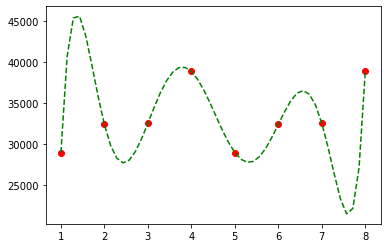

In [15]:
rexcel = pd.read_excel('rosstat_income0.xlsx', index_col=0, skiprows=[0, 1, 2, 3, 10, 16, 22, 28, 34, 40, 46], dtype={'Name': str, 'Value': int})
Y1 = np.hstack((rexcel.values[25:29, 0], rexcel.values[25:29, 0]))
X1 = [1 + k for k in range(len(Y1))]
poly1 = lagrange(X1, Y1)
X1ls = np.linspace(X1[0], X1[-1])
plt.plot(X1, Y1, 'ro', X1ls, poly1(X1ls), 'g--')

## Задание 2.
Построить полином Лагранжа для данных из файла задания 1,
использовать средние значения каждого года с 2013 по 2020.

Построить график полученного полинома Лагранжа, отметить на нем все точки данных в каждом квартале. 

Вычислить и вывести на экран нормы разности вектора поквартальных доходов и вектора соответствующих значений полинома Лагранжа, реализованные для векторов в scipy.linalg.

33948 116311 41 33948 158 28568 217 27730 276


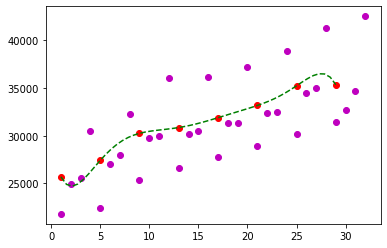

In [24]:
Y2 = rexcel.values[4::5, 0]
X2 = [1 + 4*k for k in range(len(Y1))]
poly2 = lagrange(X2, Y2)
Y2_all = np.ravel([rexcel.values[5*k:5*k + 4, 0] for k in range(8)])
X2_all = [1 + k for k in range(len(Y2_all))]
X2ls = np.linspace(X2[0], X2[-1])
plt.plot(X2, Y2, 'ro', X2_all, Y2_all, 'mo', X2ls, poly2(X2ls), 'g--')
Lagr2 = poly2(X2_all)
difference2 = Y2_all - Lagr2
print(*[round(item) for item in (norm(difference2), norm(difference2, 1), norm(difference2, -1), norm(difference2, 2), norm(difference2, -2), 
      norm(difference2, 3), norm(difference2, -3), norm(difference2, np.inf), norm(difference2, -np.inf))])

## Задание 3
Аппроксимировать $f(x) = \ln(x + 1)$ на отрезке $[0, 2]$ квадратичным сплайном с узлами с шагом 0.5.

Вычислить значения функции и сплайна в узлах равномерной сетки  от 0.1 до 2.0 с шагом 0.2, найти нормы разности полученных векторов (округлить то 4 знаков).

0.006 0.0112 0.0 0.006 0.0 0.0051 0.0 0.0041 0.0


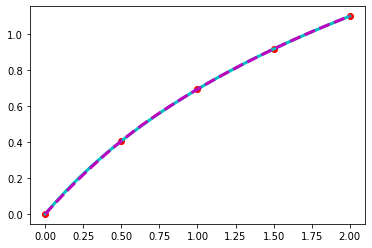

In [4]:
def f3(x):
  return np.log(x + 1)
X3 = np.arange(0, 2.1, 0.5)
Y3 = f3(X3)
plt.scatter(X3, Y3, color='red')
spl3 = interp1d(X3, Y3, kind='quadratic')
xs = np.linspace(X3[0], X3[-1], 1000)
plt.plot(xs, f3(xs), 'c-', xs, spl3(xs), 'm--', lw=3)
X3_1 = np.arange(0.1, 2.1, 0.2)
difference3 = f3(X3_1) - spl3(X3_1)
print(*[round(item, 4) for item in (norm(difference3), norm(difference3, 1), norm(difference3, -1), norm(difference3, 2), norm(difference3, -2), 
      norm(difference3, 3), norm(difference3, -3), norm(difference3, np.inf), norm(difference3, -np.inf))])

## Задание 4
Аппроксимировать $f(x) = \ln(x + 1)$ на отрезке $[0, 2]$ кубическим сплайном с узлами с шагом 0.5.

Вычислить значения функции и сплайна в узлах равномерной сетки  от 0.1 до 2.0 с шагом 0.2, найти нормы разности полученных векторов (округлить то 4 знаков).

Вычислить с помощью sympy интеграл квадрата разности $f(x)$ и сплайна (построить средствами sympy) на отрезке $[0, 2]$.

0.0025 0.0047 0.0 0.0025 0.0 0.0022 0.0 0.0019 0.0


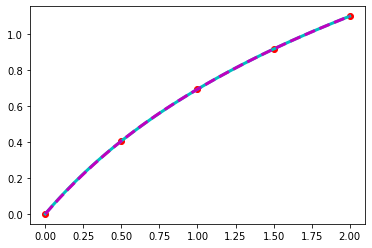

In [5]:
X3 = np.arange(0, 2.1, 0.5)
Y3 = f3(X3)
plt.scatter(X3, Y3, color='red')
spl3 = interp1d(X3, Y3, kind='cubic')
xs = np.linspace(X3[0], X3[-1], 1000)
plt.plot(xs, f3(xs), 'c-', xs, spl3(xs), 'm--', lw=3)
X3_1 = np.arange(0.1, 2.1, 0.2)
difference3 = f3(X3_1) - spl3(X3_1)
print(*[round(item, 4) for item in (norm(difference3), norm(difference3, 1), norm(difference3, -1), norm(difference3, 2), norm(difference3, -2), 
      norm(difference3, 3), norm(difference3, -3), norm(difference3, np.inf), norm(difference3, -np.inf))])

In [9]:
from sympy import interpolating_spline
x = sympy.Symbol('x')
spline4 = interpolating_spline(1, x, list(X3), list(Y3))
difference4 = (sympy.log(x + 1) - spline4)**2
sympy.integrate(difference4, (x, 0, 2))

0.000155409727674527

## Кривые Безье

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

## Задание 5
Построить кривую Безье с помощью модуля bezier:

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

Кривая должна аппроксимировать $f(x) = x\ln(x)$, проходя через точки 1 и 4, при этом в этих точках касательная кривой Безье должна совпадать с касательной $f(x)$.

Построить на общем графике $f(x)$ и кривую Безье, отметить узловые точки.

Вычислить значения функции и вертикальной координаты точки на кривой Безье в узлах равномерной сетки отрезка [1.000001, 4.0] с шагом 0.1. 

Вычислить все нормы разности полученных векторов.

Вычислить с помощью sympy интеграл квадрата разности $f(x)$ и кривой Безье на отрезке $[1, 4]$. Использовать implicitize и solve.

In [41]:
!pip install bezier --user

     |████████████████████████████████| 1.4MB 7.2MB/s 


In [10]:
import bezier

0.002
0.1357 0.6231 0.0 0.1357 0.0 0.0843 0.0 0.0387 0.0


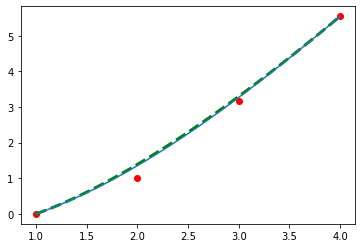

In [66]:
def f5(x):
  return x*sympy.log(x)

npf5 = sympy.lambdify(x, f5(x))
X5 = [1, 2, 3, 4]
df5 = f5(x).diff(x)
npdf5 = sympy.lambdify(x, df5)
Y5 = [npf5(X5[0]), npf5(X5[0]) + npdf5(X5[0]), npf5(X5[-1]) - npdf5(X5[-1]), npf5(X5[-1])]
Y_start = npf5(X5[0])
Y_end = npf5(X5[-1])
Y5 = [Y_start, Y_start + npdf5(X5[0]), Y_end - npdf5(X5[-1]), Y_end]
nodes = np.array([X5, Y5])
curve = bezier.Curve(nodes, degree=3)
X5plt = np.linspace(1, 4)

fig, ax = plt.subplots()
ax.plot(X5plt, npf5(X5plt), 'g--', lw=3)
ax.scatter(X5, Y5, color='red')
curve.plot(100, ax=ax)
res = curve.implicitize()
curve_y = sympy.solve(res, sympy.Symbol('y'))[0]
difference5 = (f5(x) - curve_y)**2
curve_y_np = sympy.lambdify(x, curve_y)
print(round(sympy.integrate(difference5, (x, 1, 4)), 3))
X5_1 = np.arange(1.000001, 4.1, 0.1)
difference5 = npf5(X5_1) - curve_y_np(X5_1)
print(*[round(item, 4) for item in (norm(difference5), norm(difference5, 1), norm(difference5, -1), norm(difference5, 2), norm(difference5, -2), 
      norm(difference5, 3), norm(difference5, -3), norm(difference5, np.inf), norm(difference5, -np.inf))])